In [ ]:
#!pip install sklearn

In [3]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
#from sklearn import datasets


from scipy.stats import linregress

%matplotlib notebook

#import packages
import csv


In [4]:
# Reference the file where the CSV is located
it_data= "data_scientist_US.csv"

# Import the data into a Pandas DataFrame
it_data_df = pd.read_csv(it_data)
it_data_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,...,Job Title: - Sr. Data Science Consultant Durat...,Contract,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,...,• 3+ years related a professional experience ...,Contract,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN


In [6]:
#Find out what kind of information is in the data

for col in it_data_df.columns: 
    print(col) 



crawl_timestamp
url
job_title
category
company_name
city
state
country
inferred_city
inferred_state
inferred_country
post_date
job_description
job_type
salary_offered
job_board
geo
cursor
contact_email
contact_phone_number
uniq_id
html_job_description


In [7]:
total_rows = it_data_df['crawl_timestamp'].count
print (total_rows)


<bound method Series.count of 0       2019-02-06 05:26:22 +0000
1       2019-02-06 05:33:41 +0000
2       2019-02-06 05:33:35 +0000
3       2019-02-06 05:33:42 +0000
4       2019-02-06 05:48:23 +0000
                  ...            
9995    2019-09-29 00:55:15 +0000
9996    2019-10-01 00:50:33 +0000
9997    2019-09-26 00:53:10 +0000
9998    2019-09-27 00:41:31 +0000
9999    2019-09-27 00:53:10 +0000
Name: crawl_timestamp, Length: 10000, dtype: object>


In [8]:
# create a dataframe grouping by the 'Drug Regimen' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-09-29 00:43:50 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916869827785,NaN,NaN,d2285b6e99067fb246c0f674995dad7d,<h2>About this job</h2>\r\n<p><span>Job type: ...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [9]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())
job_title_count

,job_title
job_title,
(2) Lead Data Scientist (Medicare) (62400BR),2
"(3) Senior Data Scientist - (Machine Learning, R, Python)",6
"(3) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",1
"(4) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",1
(Entry Level) Data Scientist,1
...,...
"data scientist, Econometrician- Marketing Operations- Seattle, WA",1
"data scientist, Insights & Analytics - Seattle, WA",5
"data scientist, Supply Chain - Seattle, WA",2


<IPython.core.display.Javascript object>


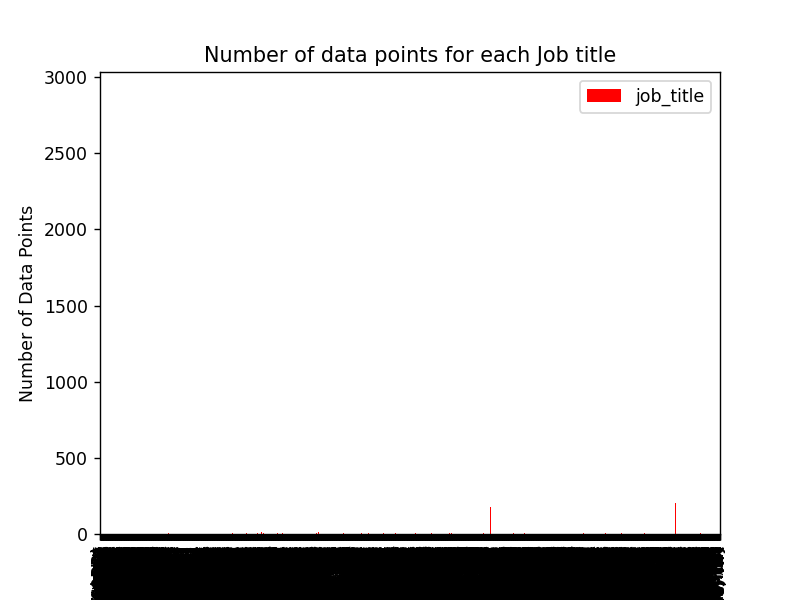

In [10]:
#count_chart = job_title_count.plot(kind='bar', title="Number of data points for each Job title", color="red")

# Set the x and y labels
#count_chart.set_xlabel("job title")
#count_chart.set_ylabel("Number of Data Points")
#plt.tight_layout()
# Save the figure
#plt.savefig("PandaBarChart.png")

#plt.show()

In [18]:
# Reference the file where the CSV is located
indeed_data= "indeed_job_dataset.csv"

# Import the data into a Pandas DataFrame
indeed_data_df = pd.read_csv(indeed_data)
indeed_data_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
5,5,Data Scientist - Entry to Experienced Level,https://www.indeed.com/rc/clk?jk=835a2db493898...,<80000,data_scientist,"['AI', 'Quantitative Analysis', 'Data Mining',...",6,National Security Agency,173.0,4.3,...,1,0,0,0,0,0,0,0,0,0
6,6,Geospatial Data Scientist,https://www.indeed.com/rc/clk?jk=6255c4e94a7ef...,<80000,data_scientist,"['Statistical Software', 'Machine Learning', '...",10,NYC Careers,30.0,3.8,...,0,0,0,0,0,0,0,0,0,1
7,7,Data Scientist,https://www.indeed.com/rc/clk?jk=f30ab3f52226b...,<80000,data_scientist,"['Machine Learning', 'R', 'SQL']",3,OM Partners,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
8,8,Bioinformatics Data Scientist,https://www.indeed.com/rc/clk?jk=a6e45b6264f26...,<80000,data_scientist,"['Linux', 'R', 'C/C++', 'Python']",4,University of Idaho,233.0,4.2,...,0,0,0,1,0,0,0,0,0,1
9,9,Data Scientist,https://www.indeed.com/rc/clk?jk=56090c965b57d...,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4.3,...,0,0,0,1,0,0,0,0,0,1


In [13]:
#Find out what kind of information is in the data

for col in indeed_data_df.columns: 
    print(col) 



Unnamed: 0
Job_Title
Link
Queried_Salary
Job_Type
Skill
No_of_Skills
Company
No_of_Reviews
No_of_Stars
Date_Since_Posted
Description
Location
Company_Revenue
Company_Employees
Company_Industry
python
sql
machine learning
r
hadoop
tableau
sas
spark
java
Others
CA
NY
VA
TX
MA
IL
WA
MD
DC
NC
Other_states
Consulting and Business Services
Internet and Software
Banks and Financial Services
Health Care
Insurance
Other_industries


In [15]:
total_rows = indeed_data_df['Job_Title'].count
print (total_rows)


<bound method Series.count of 0                                          Data Scientist
1                                          Data Scientist
2                                          Data Scientist
3               Graduate Studies Program - Data Scientist
4                                        Data Scientist I
                              ...                        
5710                                 Senior Data Engineer
5711    Principal Data Engineer (Java, Spark, Storm, AWS)
5712    Executive Director- Architect: Data Engineerin...
5713          Senior Manager, Data Engineering (hands on)
5714    Principal Visual Analytics / Big Data Engineer...
Name: Job_Title, Length: 5715, dtype: object>


In [17]:
# create a dataframe grouping by the 'Drug Regimen' column
sorted_indeed_df = indeed_data_df.groupby('Job_Title')
sorted_indeed_df.head(50)

,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,5708,Senior Big Data Engineer,https://www.indeed.com/rc/clk?jk=876eec2fa6d83...,>160000,data_engineer,"['Hive', 'Hadoop', 'Kafka', 'HBase', 'Java', '...",6,Workbridge Associates,40.0,3.4,...,0,0,0,0,0,0,0,0,0,1
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,3.7,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,3.9,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4.0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# Create a dataframe for counts of data
indeed_title_count = pd.DataFrame(sorted_indeed_df['Job_Title'].count())
indeed_title_count

,Job_Title
Job_Title,
1244527 - Senior Data Scientist,1
1244529 - Data Scientist,1
1244531 - Data Scientist,1
16th EWS Mssion Data Engineer,1
2019 PhD Data Scientist Internship - Maps,1
...,...
eDiscovery Data Analyst,1
innovation Ochsner - iO - Data Scientist - Benson Tower,1
innovationOchsner (iO) - Data Scientist - Benson Tower,1
